<a href="https://colab.research.google.com/github/angelinaw1/IS_4487_Tokyo/blob/main/day3lab_angelinawong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [2]:
# your code goes here
import pandas as pd

# Load Data

In [3]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [4]:
# Your code goes here
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [5]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [6]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [7]:
# Drop NAs
df = ss.dropna()

In [8]:
# Search for and filter outliers
ss.describe()
ss_filtered = ss[ss['quantity'] <= 10]
ss_filtered = ss_filtered[ss_filtered['product_price'] <= 2000]

In [9]:
# create total_purchase
df['total_purchase'] = df['product_price'] * df['quantity']

<ipython-input-9-d1c86d192cae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_purchase'] = df['product_price'] * df['quantity']


Check that your cleaning worked

In [10]:
# your code goes here
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_purchase
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [11]:
# average price

# Extract year and month
ss['order_date'] = pd.to_datetime(ss['order_date'], errors='coerce') # Handle out-of-bounds dates
ss['year'] = ss['order_date'].dt.year
ss['month'] = ss['order_date'].dt.month

# Group by year and month, then calculate mean price
average_price_per_year_month = ss.groupby(['year', 'month'])['product_price'].mean()
print(average_price_per_year_month)

year    month
1922.0  6.0      8550.073390
2020.0  1.0      3172.420978
        2.0      3217.667212
        3.0      3242.706768
        4.0      3194.646275
        5.0      3192.571359
        6.0      3151.209623
        7.0      1959.974251
        8.0      1921.246151
        9.0      1740.987143
        10.0     1800.830762
        11.0     1693.386178
        12.0     1716.205675
2021.0  1.0      1774.621612
        2.0      1763.226404
        3.0      1761.580940
        4.0      1691.161107
        5.0      1643.897690
        6.0      1696.822340
        7.0      4284.421507
        8.0      6573.423124
        9.0      7086.669690
        10.0     6647.267347
        11.0     6727.223221
        12.0     6001.624570
2022.0  1.0      6537.449793
        2.0      6805.364523
        3.0      5851.014440
        4.0      6467.757094
        5.0      7108.572205
        6.0      6955.332040
2029.0  6.0         3.640000
        7.0      3263.188118
        8.0         6.656667


In [12]:
# total revenue
ss['revenue'] = ss['product_price'] * ss['quantity']
ss_revenue = ss.groupby(['year', 'month'])['revenue'].sum()
print(ss_revenue)

year    month
1922.0  6.0        979559.95
2020.0  1.0       4745149.93
        2.0        530915.09
        3.0        710043.07
        4.0        651707.84
        5.0        657669.70
        6.0        668056.44
        7.0        484113.64
        8.0        534106.43
        9.0        341233.48
        10.0       401585.26
        11.0       323436.76
        12.0       559483.05
2021.0  1.0        429458.43
        2.0        470781.45
        3.0        468580.53
        4.0        488745.56
        5.0        540842.34
        6.0        529408.57
        7.0      10495978.77
        8.0      47239239.96
        9.0      50625473.56
        10.0     53123132.48
        11.0     50213508.07
        12.0     60364261.25
2022.0  1.0      58216747.14
        2.0      58175468.30
        3.0      57460161.50
        4.0      63217187.94
        5.0      73964841.92
        6.0      67965140.91
2029.0  6.0            19.55
        7.0        517358.82
        8.0            39.94


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

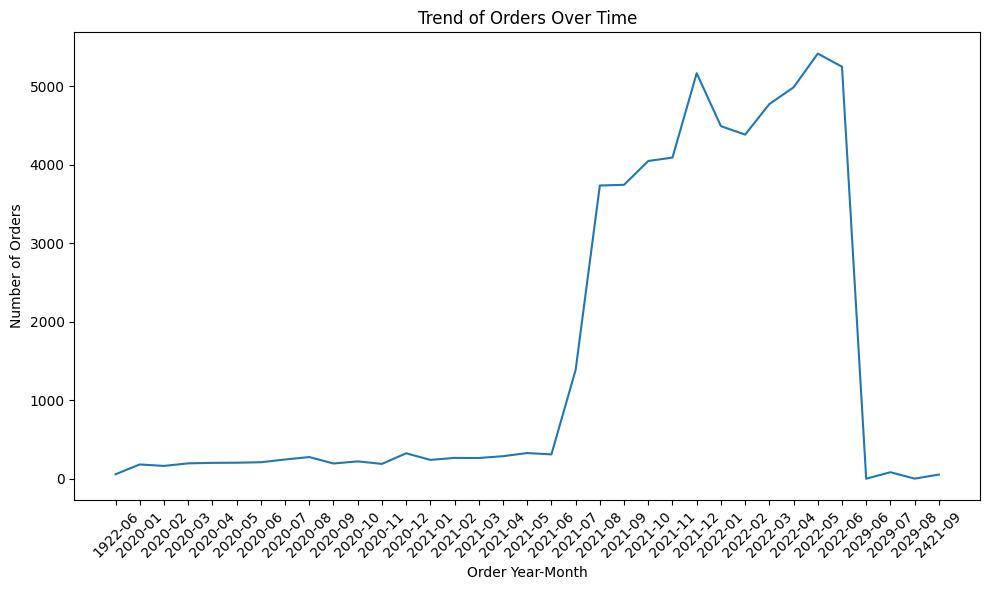

In [13]:
# Your code goes here.  Plot 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group the data by 'order_year_month' and count the number of orders:
orders_over_time = ss.groupby('order_year_month')['order_id'].count().reset_index()

# 2. Create the line plot:
plt.figure(figsize=(10, 6))
sns.lineplot(data=orders_over_time, x='order_year_month', y='order_id')
plt.xlabel('Order Year-Month')
plt.ylabel('Number of Orders')
plt.title('Trend of Orders Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

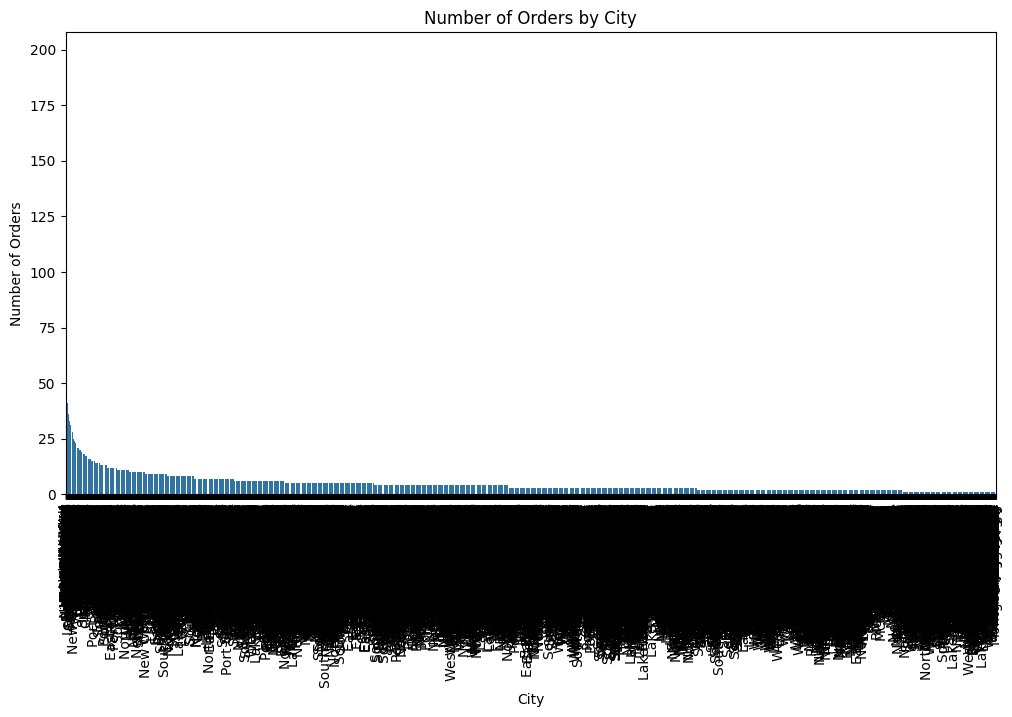

In [15]:
# Your code goes here.  Plot 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group the data by 'city' and count the number of orders:
orders_by_city = ss.groupby('city')['order_id'].count().reset_index()

# 2. Sort the data by number of orders (descending):
orders_by_city = orders_by_city.sort_values(by='order_id', ascending=False)

# 3. Create a bar plot:
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_city, x='city', y='order_id')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by City')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

Make an interpretive comment.